In [1]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import stats
from pathlib import Path
import sys
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tueplots import axes, bundles

# Increase the resolution of all the plots below
bundles.beamer_moml()
plt.rcParams.update({"figure.dpi": 200,"figure.facecolor":"w","figure.figsize": (15,10)})

from utilities.utl import remove_outliers


In [2]:
dir_script = Path("__file__").parent.absolute()
dir_plots = Path.joinpath(dir_script.parent.absolute(),"06_plots","02_group_comparisons")
dir_prep = Path.joinpath(dir_script.parent.absolute(),"04_data","01_prep")
print(dir_script)

dir_plots.mkdir(parents=False, exist_ok=True)

dat_pupil = pd.read_csv(Path.joinpath(dir_prep,"all_trials_pupil.csv"), index_col=False)
dat_gss = pd.read_csv(Path.joinpath(dir_prep,"all_trials_gss.csv"), index_col=False)

list(dat_pupil.columns)

c:\Users\User\Desktop\kiel\tremor_feedback_jw\05_scripts


['Unnamed: 0',
 'ID',
 'Trial n',
 'Feedback type',
 'Feedback angle',
 'Pupil size',
 'Percentage bad pupil samples',
 'Group']

In [3]:
full = pd.merge(dat_gss, dat_pupil, on=["ID","Trial n","Group","Feedback type","Feedback angle"])
full = full.loc[:,~full.columns.str.startswith('Unnamed')]


In [7]:
pat = full.groupby("Group").get_group("p")
pat = pat.loc[pat["Percentage bad pupil samples"] < 20,:]

ppl_ao_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "ao"),"Pupil size"]
ppl_ao_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "ao"),"Pupil size"]
t_ao, p_ao = stats.mannwhitneyu(ppl_ao_high,ppl_ao_low)

ppl_va_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "va"),"Pupil size"]
ppl_va_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "va"),"Pupil size"]
t_va, p_va = stats.mannwhitneyu(ppl_va_high,ppl_va_low)

ppl_vo_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "vo"),"Pupil size"]
ppl_vo_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "vo"),"Pupil size"]
t_vo, p_vo = stats.mannwhitneyu(ppl_vo_high,ppl_vo_low)

print(f'High-low differences for patients for visual only condition is p:{p_ao:.3f}')
print(f'High-low differences for patients for visual-auditive condition is p:{p_va:.3f}')
print(f'High-low differences for patients for auditiv only condition is p:{p_vo:.3f}')

High-low differences for patients for visual only condition is p:0.661
High-low differences for patients for visual-auditive condition is p:0.780
High-low differences for patients for auditiv only condition is p:0.448


In [8]:
df = remove_outliers(pat, ["Power [4-12]"], 2)


Working on column: Power [4-12]


<AxesSubplot:xlabel='Power [4-12]', ylabel='Pupil size'>

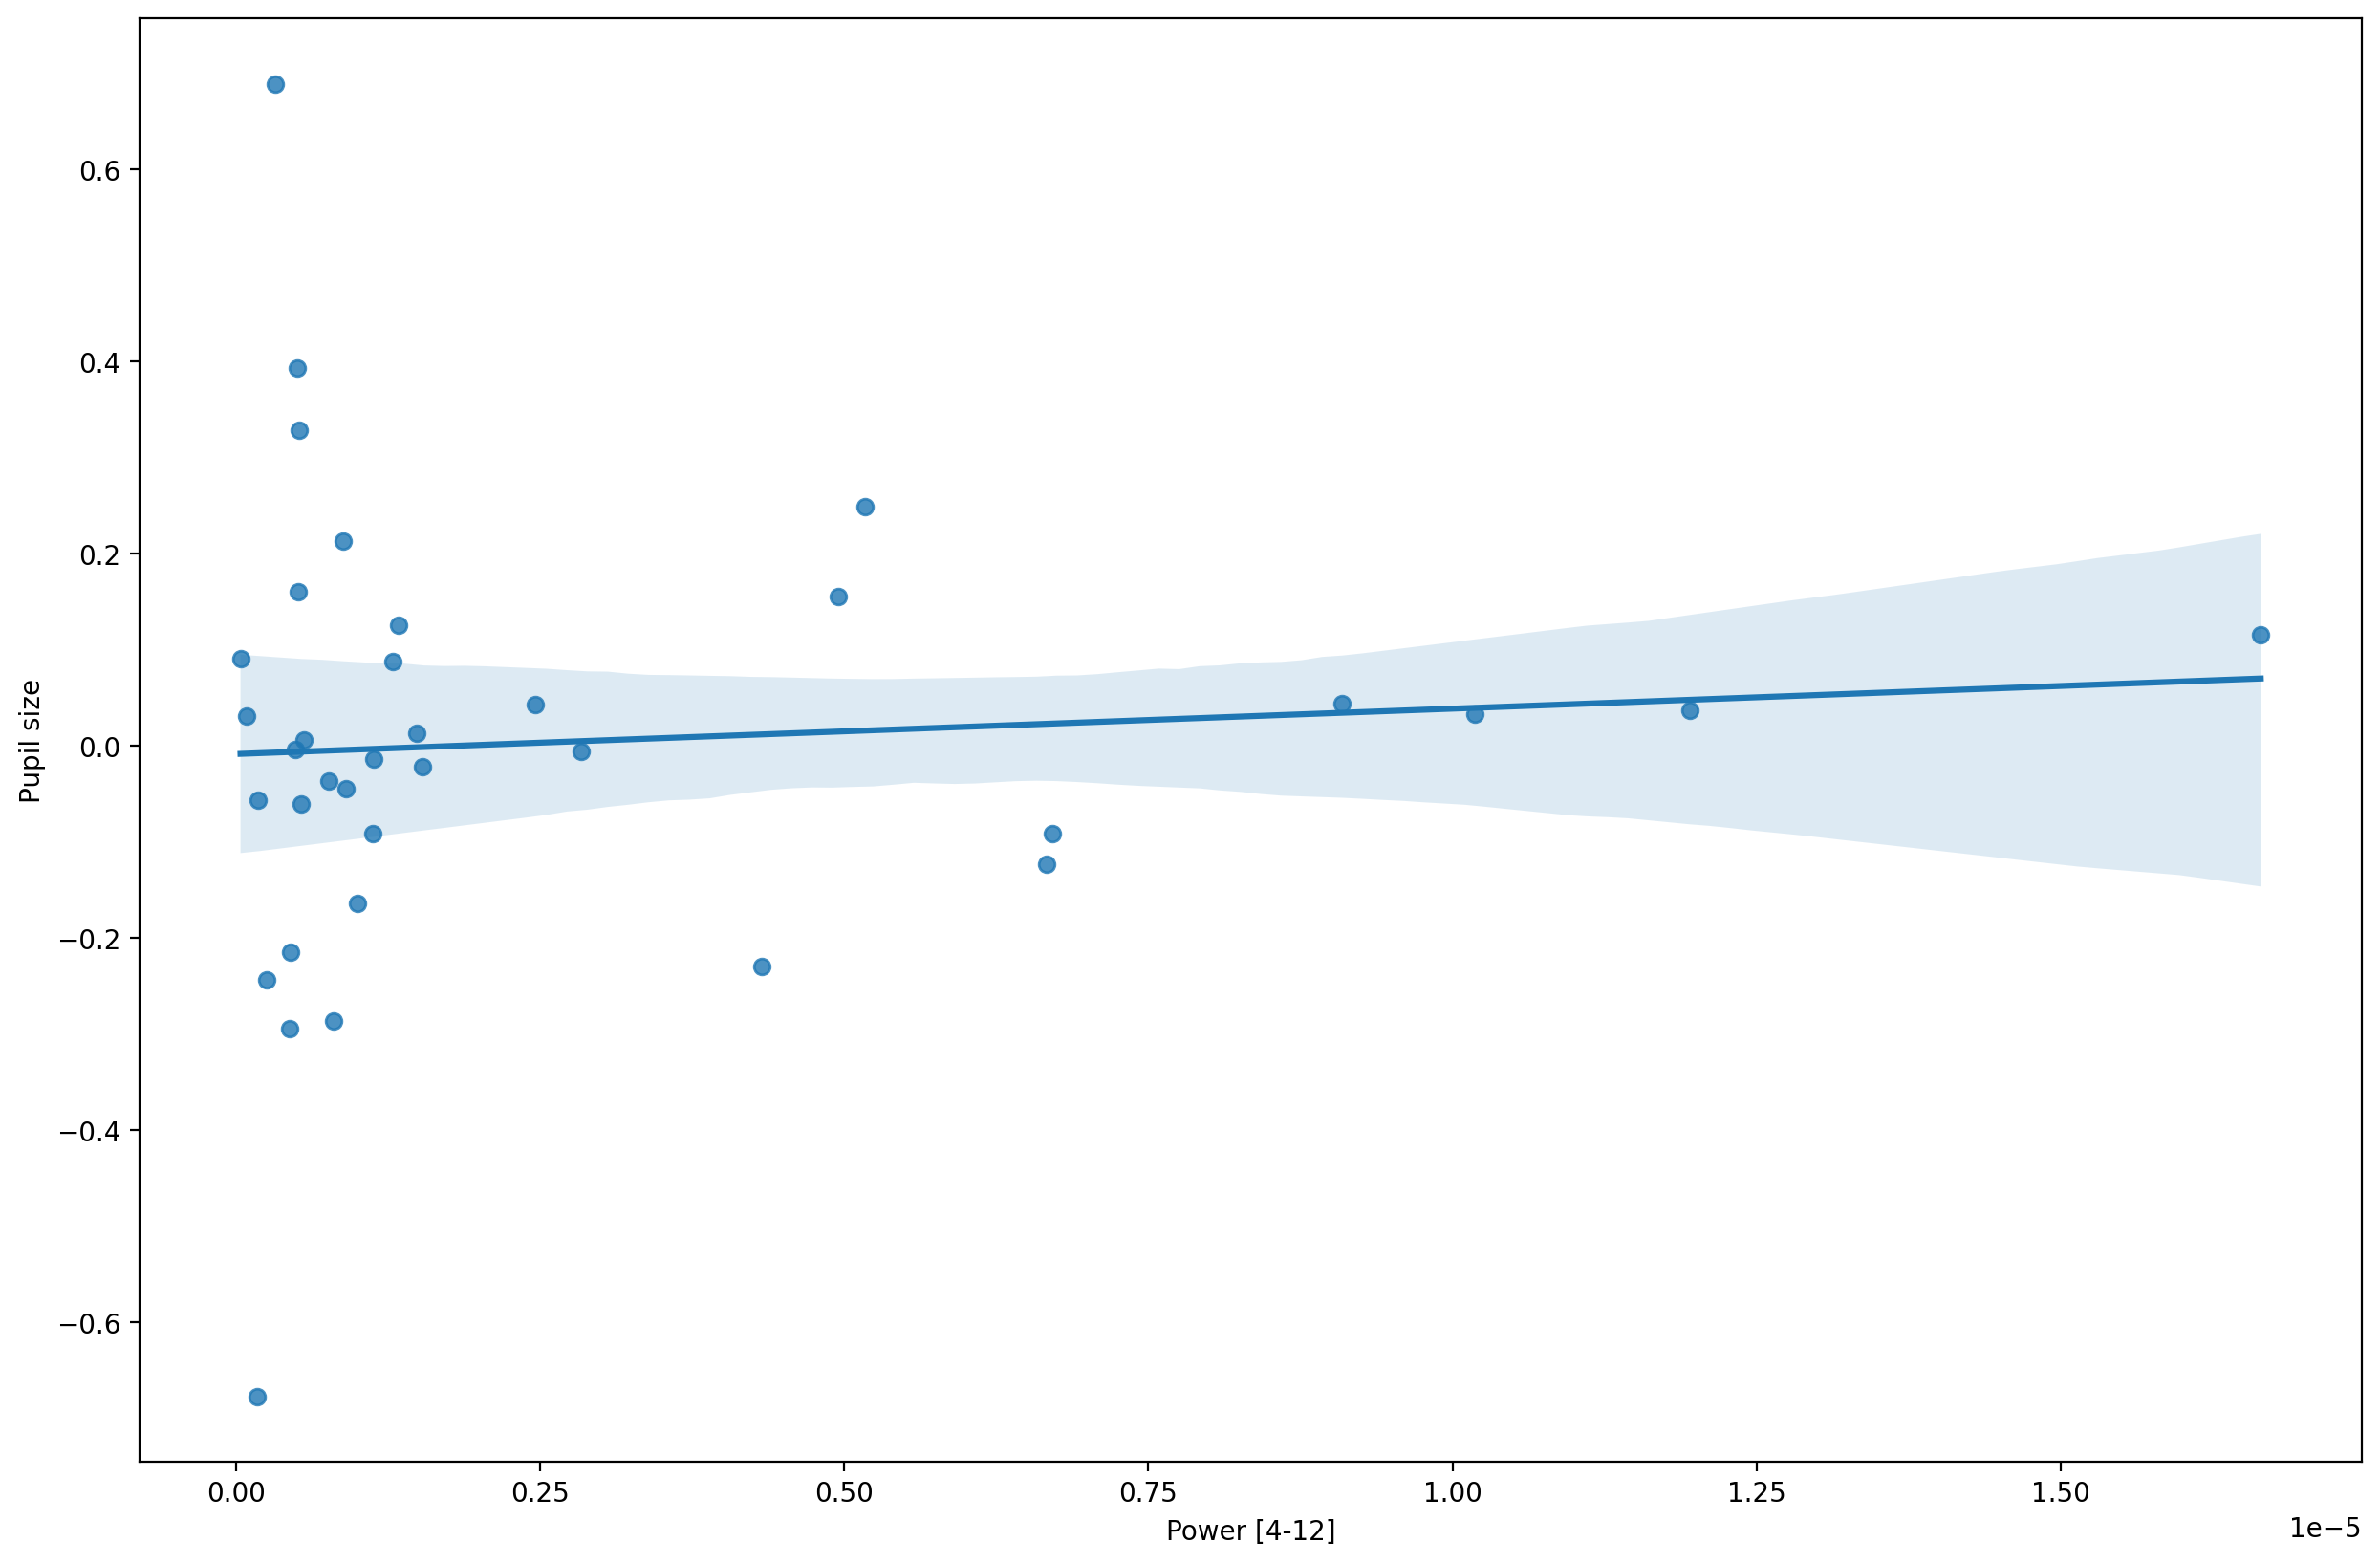

In [9]:
sns.regplot(data = df[df["Feedback type"] == "ao"], x = "Power [4-12]", y = "Pupil size")